# 변화율과 도함수를 복잡한 함수로 확장하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

np.set_printoptions(precision=4, linewidth=150)

mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']

style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]


In [2]:
def arrowed_spines(fig, ax, axis='both', remove_ticks=False):
    """
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    if axis == 'x':
        ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
                 head_width=hw, head_length=hl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False) 
    elif axis == 'y':
        ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
                 head_width=yhw, head_length=yhl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False)
    else :
        ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
                 head_width=hw, head_length=hl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False) 

        ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
                 head_width=yhw, head_length=yhl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False)
   

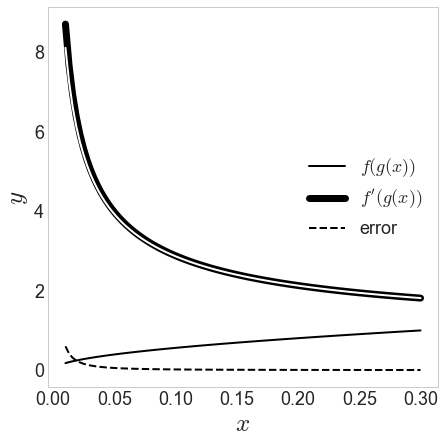

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

x = np.linspace(0.01, 0.3, 100)

h = 0.01

g  = lambda x : x**2 + 3*x
dg = lambda x : (g(x+h)-g(x)) / h

f  = lambda x : np.sqrt(x)
df = lambda x : (f(x+h)-f(x)) / h

dfg = lambda x : (2*x+3) / (2*np.sqrt(x**2+3*x))

plt.plot( x, f(g(x)), 'k', label=r"$f(g(x))$") 
plt.plot( x, dfg(x),  'k', label=r"$f'(g(x))$", lw=7) 
plt.plot( x, df(g(x))*dg(x), c='white' )

plt.plot( x, dfg(x)-df(g(x))*dg(x), '--', c='k', label="error")

plt.legend(loc="right", fontsize=18)

plt.show()

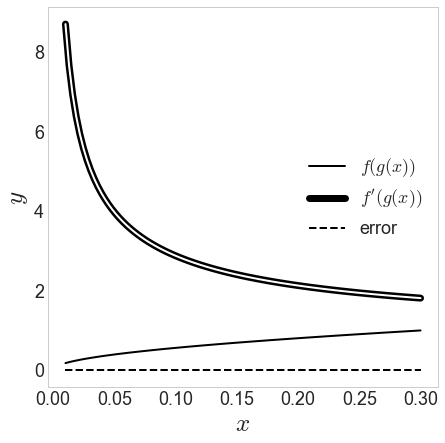

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

x = np.linspace(0.01, 0.3, 100)

g  = lambda x : x**2 + 3*x
dg = lambda x : 2*x + 3

f  = lambda x : np.sqrt(x)
df = lambda x : 1/(2*np.sqrt(x))

dfg = lambda x : (2*x+3) / (2*np.sqrt(x**2+3*x))

plt.plot( x, f(g(x)), 'k', label=r"$f(g(x))$") 
plt.plot( x, dfg(x),  'k', label=r"$f'(g(x))$", lw=7) 
plt.plot( x, df(g(x))*dg(x), c='white' )

plt.plot( x, dfg(x)-df(g(x))*dg(x), '--', c='k', label="error")

plt.legend(loc="right", fontsize=18)

plt.show()

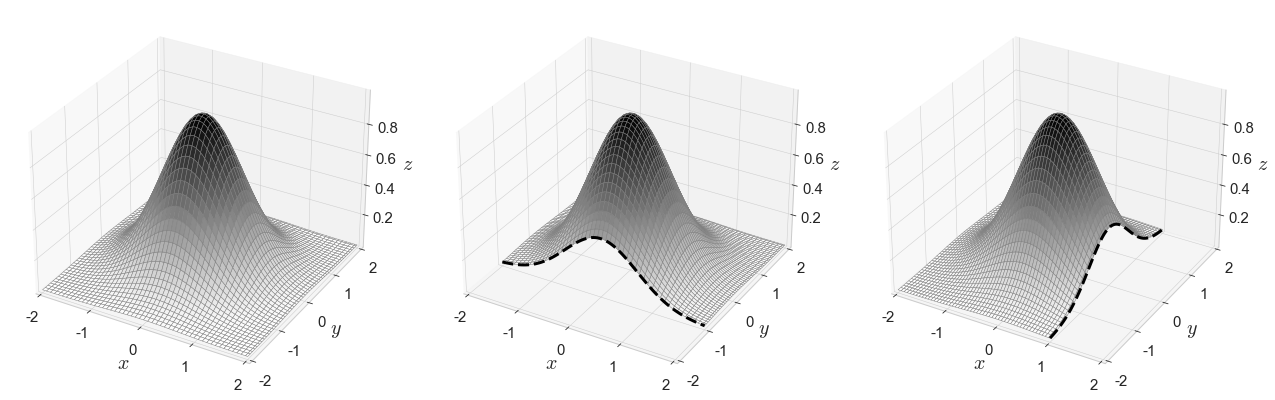

In [5]:
fig = plt.figure(figsize=(23,7))

f = lambda x, y :np.exp(-(x**2 + y**2))

#####################################################################
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=plt.cm.binary, edgecolor="gray", alpha=1)
# ax.view_init(50, 50)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)
ax1.set_xlabel('$x$', fontsize=20)
ax1.set_ylabel('$y$', fontsize=20)
ax1.set_zlabel('$z$', fontsize=20)
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_xticks( [-2, -1, 0, 1, 2] ) 
ax1.set_xticklabels([-2, -1, 0, 1, 2] , fontsize=15 )
ax1.set_yticks( [-2, -1, 0, 1, 2] ) 
ax1.set_yticklabels([-2, -1, 0, 1, 2] , fontsize=15 )

#####################################################################
x = np.linspace(-2,2,100)
y = np.linspace(-1,2,100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z, cmap=plt.cm.binary, edgecolor="gray", alpha=1)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)
ax2.set_xlabel('$x$', fontsize=20)
ax2.set_ylabel('$y$', fontsize=20)
ax2.set_zlabel('$z$', fontsize=20)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_xticks( [-2, -1, 0, 1, 2] ) 
ax2.set_xticklabels([-2, -1, 0, 1, 2] , fontsize=15 )
ax2.set_yticks( [-2, -1, 0, 1, 2] ) 
ax2.set_yticklabels([-2, -1, 0, 1, 2] , fontsize=15 )

Zx = f(x, -1)
ax2.plot3D(x, [-1.]*x.shape[0], Zx, '--', lw=3, c='k')


#####################################################################
x = np.linspace(-2,1,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z, cmap=plt.cm.binary, edgecolor="gray", alpha=1)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.zaxis.set_tick_params(labelsize=15)
ax3.set_xlabel('$x$', fontsize=20)
ax3.set_ylabel('$y$', fontsize=20)
ax3.set_zlabel('$z$', fontsize=20)
ax3.set_xlim([-2, 2])
ax3.set_ylim([-2, 2])
ax3.set_xticks( [-2, -1, 0, 1, 2] ) 
ax3.set_xticklabels([-2, -1, 0, 1, 2] , fontsize=15 )
ax3.set_yticks( [-2, -1, 0, 1, 2] ) 
ax3.set_yticklabels([-2, -1, 0, 1, 2] , fontsize=15 )

Zy = f(1, y)
ax3.plot3D([1.]*x.shape[0], y, Zy, '--', lw=3, c='k')

plt.subplots_adjust(wspace=0.0)

plt.show()